In [2]:
# Importing the Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
from keras.src.models import Sequential
from keras.src.layers import Dense, Dropout, BatchNormalization
from keras.src.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
print("All Imports done")

All Imports done


In [3]:
import pandas as pd
df=pd.read_csv(r"C:\Users\parth\Desktop\Projects\Credit_Card_Fraud_Detection\creditcard.csv")

In [4]:
# Basic Information about the dataset
print("\nDataset Information:")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
print(df.head(5))

print("\nData Types:")
print(df.dtypes)

print("\nBasic Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Dataset Information:
Shape: (284807, 31)

First few rows:
   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]

Data Types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24  

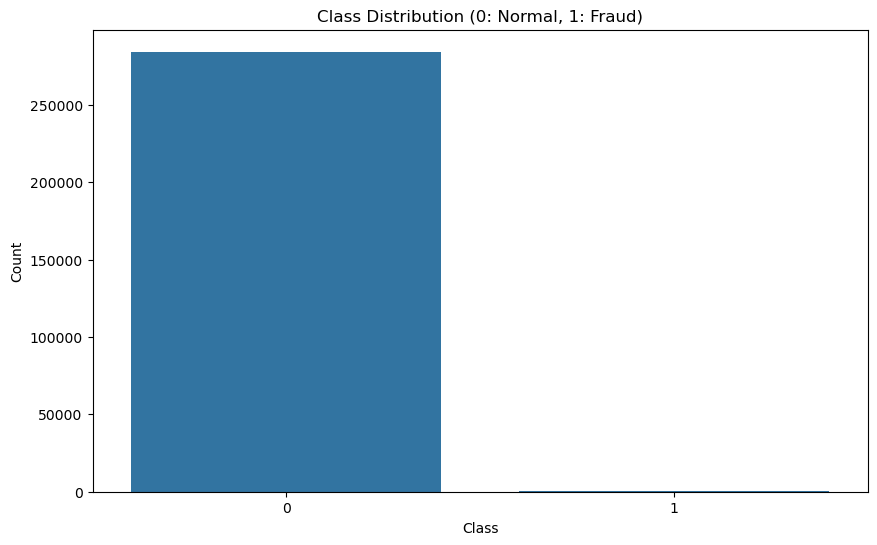

In [9]:
# Checking how many are fraud cases and real transaction in dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Normal, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

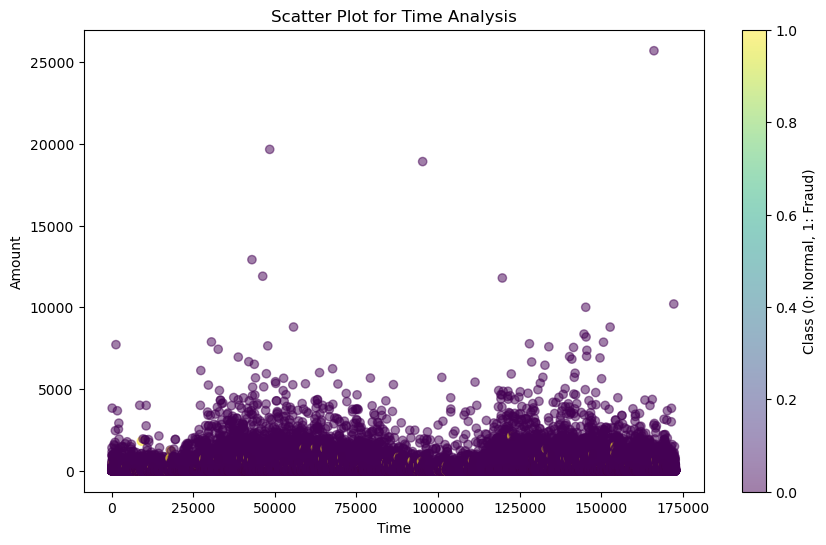

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Time'],df['Amount'],c=df['Class'],alpha=0.5)
plt.title("Scatter Plot for Time Analysis")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.colorbar(label='Class (0: Normal, 1: Fraud)')
plt.show()


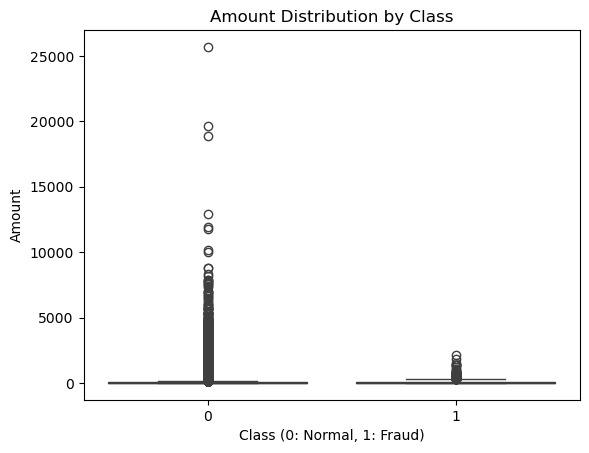

In [21]:
sns.boxplot(x=df['Class'], y=df['Amount'])
plt.title('Amount Distribution by Class')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Amount')
plt.show()

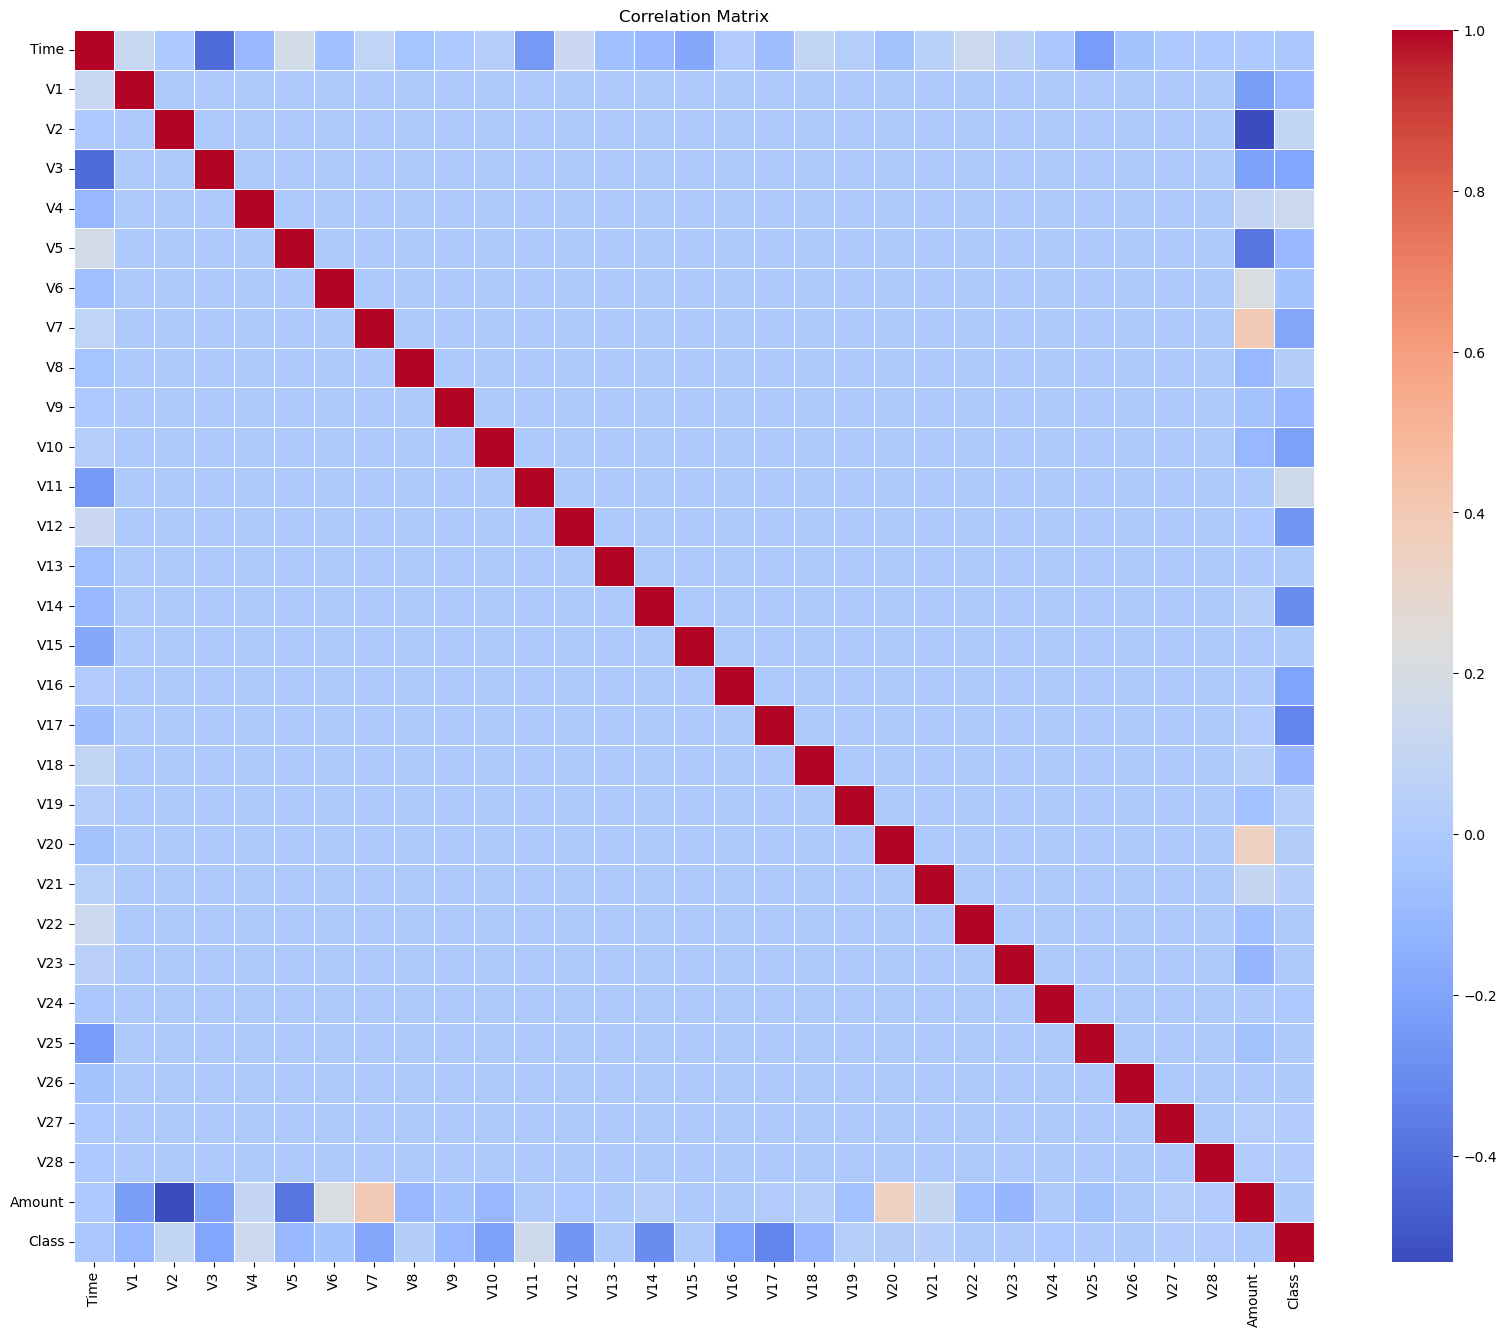

In [22]:
plt.figure(figsize=(20, 16))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()